In [57]:
import collections

import numpy as np
import matplotlib.pyplot as plt

from scholarly import scholarly


In [2]:
# code for initial metrics
from scholarly import scholarly
myID = 'nCEUdSoAAAAJ'

author = scholarly.search_author_id(myID)
print(author['citedby'])

352


In [4]:
myID = 'nCEUdSoAAAAJ'

author = scholarly.search_author_id(myID)

In [5]:
scholarly.pprint(author)

{'affiliation': 'University of California, Irvine',
 'citedby': 335,
 'email_domain': '@uci.edu',
 'filled': False,
 'interests': ['Neuroscience',
               'Learning and Memory',
               'Artificial Intelligence',
               'Cognitive Science',
               'Olfaction'],
 'name': 'Keiland Cooper',
 'scholar_id': 'nCEUdSoAAAAJ',
 'source': 'AUTHOR_PROFILE_PAGE',
 'url_picture': 'https://scholar.googleusercontent.com/citations?view_op=view_photo&user=nCEUdSoAAAAJ&citpid=3'}


In [39]:
author

{'container_type': 'Author',
 'filled': {'basics', 'publications'},
 'scholar_id': 'nCEUdSoAAAAJ',
 'source': <AuthorSource.AUTHOR_PROFILE_PAGE: 1>,
 'name': 'Keiland Cooper',
 'url_picture': 'https://scholar.googleusercontent.com/citations?view_op=view_photo&user=nCEUdSoAAAAJ&citpid=3',
 'affiliation': 'University of California, Irvine',
 'interests': ['Neuroscience',
  'Learning and Memory',
  'Artificial Intelligence',
  'Cognitive Science',
  'Olfaction'],
 'email_domain': '@uci.edu',
 'citedby': 335,
 'publications': [{'container_type': 'Publication',
   'source': <PublicationSource.AUTHOR_PUBLICATION_ENTRY: 2>,
   'bib': {'title': 'More than smell—COVID-19 is associated with severe impairment of smell, taste, and chemesthesis',
    'pub_year': 2020,
    'author': 'Valentina Parma and Kathrin Ohla and Maria G Veldhuizen and Masha Y Niv and Christine E Kelly and Alyssa J Bakke and Keiland W Cooper and Cédric Bouysset and Nicola Pirastu and Michele Dibattista and Rishemjit Kaur and 

In [92]:
for pub in auth2fill['publications']:
    print(pub['bib'])

{'title': 'More than smell—COVID-19 is associated with severe impairment of smell, taste, and chemesthesis', 'pub_year': 2020, 'author': 'Valentina Parma and Kathrin Ohla and Maria G Veldhuizen and Masha Y Niv and Christine E Kelly and Alyssa J Bakke and Keiland W Cooper and Cédric Bouysset and Nicola Pirastu and Michele Dibattista and Rishemjit Kaur and Marco Tullio Liuzza and Marta Y Pepino and Veronika Schöpf and Veronica Pereda-Loth and Shannon B Olsson and Richard C Gerkin and Paloma Rohlfs Domínguez and Javier Albayay and Michael C Farruggia and Surabhi Bhutani and Alexander W Fjaeldstad and Ritesh Kumar and Anna Menini and Moustafa Bensafi and Mari Sandell and Iordanis Konstantinidis and Antonella Di Pizio and Federica Genovese and Lina Öztürk and Thierry Thomas-Danguin and Johannes Frasnelli and Sanne Boesveldt and Özlem Saatci and Luis R Saraiva and Cailu Lin and Jérôme Golebiowski and Liang-Dar Hwang and Mehmet Hakan Ozdener and Maria Dolors Guàrdia and Christophe Laudamiel a

In [91]:
auth2fill = scholarly.fill(author, sections=['publications', 'basics', 'indices', 'counts'])
print(auth2fill['filled'])
auth2fill.keys()

{'basics', 'indices', 'publications', 'counts'}


dict_keys(['container_type', 'filled', 'scholar_id', 'source', 'name', 'url_picture', 'affiliation', 'interests', 'email_domain', 'citedby', 'publications', 'citedby5y', 'hindex', 'hindex5y', 'i10index', 'i10index5y', 'cites_per_year'])

In [84]:
print('hindex:', auth2fill['hindex'])
print('i10index:', auth2fill['i10index'])
print('citedby:', auth2fill['citedby'])
print(auth2fill['cites_per_year'])

hindex: 5
i10index: 5
citedby: 335
{2019: 1, 2020: 162, 2021: 171}


In [85]:

# find number of papers per year
pubYears = [int(pub['bib']['pub_year']) for pub in auth2fill['publications']]
pubYears

pubYearTally = collections.Counter(pubYears)
print(pubYearTally)


# do some stats with it

pubspan = max(set(pubYears)) - min(set(pubYears))
print('pubSpan:', pubspan, 'years')

Counter({2020: 6, 2018: 1, 2021: 1, 2019: 1})
pubSpan: 3 years


In [95]:
# pub_authors = [pub['bib']['author'].split(' and ') for pub in auth2fill['publications']]
filled_pubs = [scholarly.fill(pub) for pub in auth2fill['publications']]



In [114]:
# _ = [print(pub['bib']['title']) for pub in filled_pubs] # print pub titles

pub_authors = [pub['bib']['author'].split(' and ') for pub in filled_pubs]
all_authors = [auth for pubauth in pub_authors for auth in pubauth]

num_auths_pub = [len(auths) for auths in pub_authors]

print('Total authors:', len(all_authors))
print(num_auths_pub)

# Do a bit of string formatting and filtering
all_authors_lower = [a.lower() for a in all_authors]
print(len(set(all_authors_lower)))

me_list = ['keiland cooper', 'keiland w cooper', 'keiland w. cooper', 'keiland wade cooper']
all_authors_lower = [a for a in all_authors_lower if a not in me_list]
print(len(set(all_authors_lower)))
# set(all_authors_lower)

Total authors: 299
[93, 14, 6, 129, 24, 3, 1, 28, 1]
200
196


In [124]:
# assuming that scholar has the authors in order, we can compute my authorship position

# save the authorship position and n authors
# for a given search string (works because my name is unique!)

me = 'keiland'
pos_store = np.zeros((len(pub_authors)))
nauth_store = np.zeros((len(pub_authors)))
for pub_i, authors in enumerate(pub_authors):
    nauth_store[pub_i] = len(authors)
    for pos, auth in enumerate(authors):
        if me in auth.lower(): 
            #print(pos+1, 'of', len(authors))
            pos_store[pub_i] = pos+1
print(pos_store)
print(nauth_store)

print(np.mean(pos_store), np.std(pos_store))

[ 7.  1.  2. 15. 15.  2.  1. 13.  1.]
[ 93.  14.   6. 129.  24.   3.   1.  28.   1.]
6.333333333333333 5.94418483337567


(9, 100000)


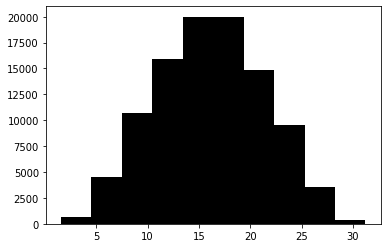

16.1222 5.255449141464364
2std thresh: 5.611301717071271 observed: 6.333333333333333


In [166]:
# quick analysis, is my authorship postion signifigant? 
# randomly pick an authorship postion from each pub
# take the mean, and then plot

nIter = 100000

auths_sim = np.zeros((len(nauth_store), nIter))
for i in range(len(nauth_store)):
    auths_sim[i,:] = np.random.randint(0,nauth_store[i], (1,nIter))[0]


print(auths_sim.shape)
auth_sim_mu = np.mean(auths_sim, axis=0)

plt.hist(auth_sim_mu, color='k')
plt.show()

print(np.mean(auth_sim_mu), np.std(auth_sim_mu))

sig_thresh = np.mean(auth_sim_mu) - (2* np.std(auth_sim_mu))
print('2std thresh:', sig_thresh, 'observed:', np.mean(pos_store))

# haha close, but no cigar
# really, this should be relative to the number of authors... 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

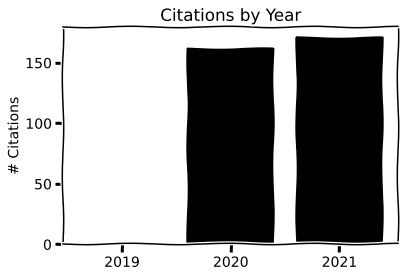

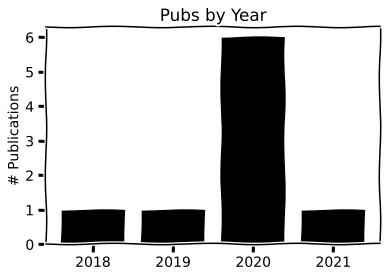

In [76]:
citeDict = auth2fill['cites_per_year']
with plt.xkcd(scale=.7, length=100, randomness=2):
    plt.bar(citeDict.keys(), citeDict.values(), color='k')
    plt.xticks(list(citeDict.keys()))
    plt.ylabel('# Citations')
    plt.title('Citations by Year')
    plt.show()

with plt.xkcd(scale=.7, length=100, randomness=2):
    plt.bar(pubYearTally.keys(), pubYearTally.values(), color='k')
    plt.xticks(list(pubYearTally.keys()))
    plt.ylabel('# Publications')
    plt.title('Pubs by Year')
    plt.show()

In [9]:
#scholarly.fill(author, sections=['basics', 'indices', 'coauthors'])
author = scholarly.search_author_id(myID)
filledAuthor = scholarly.fill(author, sections=['publications'])

In [18]:
for pub in filledAuthor['publications']:
    print(pub['author_pub_id'], pub['num_citations'])

nCEUdSoAAAAJ:IjCSPb-OGe4C 142
nCEUdSoAAAAJ:Tyk-4Ss8FVUC 82
nCEUdSoAAAAJ:W7OEmFMy1HYC 48
nCEUdSoAAAAJ:0EnyYjriUFMC 31
nCEUdSoAAAAJ:roLk4NBRz8UC 25
nCEUdSoAAAAJ:u-x6o8ySG0sC 5
nCEUdSoAAAAJ:u5HHmVD_uO8C 2
nCEUdSoAAAAJ:5nxA0vEk-isC 0
nCEUdSoAAAAJ:UebtZRa9Y70C 0


In [34]:
# print([citation['bib']['title'] for citation in scholarly.citedby(pub)])

pub = filledAuthor['publications'][0]
print(pub['bib']['title'])
#citedJournals = [citation['bib']['journal'] for citation in scholarly.citedby(pub)]

noJ = 0
citedJournals = []
for citation in scholarly.citedby(pub):
    try:
        citedJournals.append(citation['bib']['venue'])
    except KeyError: 
        noJ += 1
        

More than smell—COVID-19 is associated with severe impairment of smell, taste, and chemesthesis


In [35]:
len(citedJournals), noJ

(137, 0)

In [38]:
citation

{'container_type': 'Publication',
 'source': <PublicationSource.PUBLICATION_SEARCH_SNIPPET: 1>,
 'bib': {'title': "La Covid 19 nous rappelle à quel point le goût et l'arôme des aliments sont essentiels au quotidien!",
  'author': ['G Feron'],
  'pub_year': '2021',
  'venue': 'Cahiers De Nutrition et De Die´ te´ tique',
  'abstract': "Il y a deux ans, j'avais rendu visite au Professeur Thomas Hummel, médecin exerçant à l'université de Dresde en Allemagne et expert mondialement reconnu des troubles du goût et de l'odorat. Dans sa clinique, Thomas réalise plusieurs centaines de consultation par an"},
 'filled': False,
 'gsrank': 137,
 'pub_url': 'https://www.ncbi.nlm.nih.gov/pmc/articles/pmc7878113/',
 'author_id': ['BWSRViEAAAAJ'],
 'num_citations': 0,
 'url_scholarbib': '/scholar?q=info:yvS0tVomiqEJ:scholar.google.com/&output=cite&scirp=136&hl=en',
 'url_add_sclib': '/citations?hl=en&xsrf=&continue=/scholar%3Fhl%3Den%26start%3D130%26as_sdt%3D2005%26sciodt%3D0,5%26cites%3D159806873772278

In [24]:
# does not handel manually input data well

# Clean it all up a bit

In [167]:
myID = 'nCEUdSoAAAAJ'

# Search an author ID and fill the info
author = scholarly.search_author_id(myID)
authfill = scholarly.fill(author, sections=['publications', 
                                            'basics', 
                                            'indices', 
                                            'counts'])

# Fetch some of the basic stats
print('hindex:', authfill['hindex'])
print('i10index:', authfill['i10index'])
print('citedby:', authfill['citedby'])
print(authfill['cites_per_year'])



# find number of papers per year
pubYears = [int(pub['bib']['pub_year']) for pub in authfill['publications']]
print(pubYears)

pubYearTally = collections.Counter(pubYears)
print(pubYearTally)


# do some basic stats with it
pubspan = max(set(pubYears)) - min(set(pubYears))
print('pubSpan:', pubspan, 'years')


# Fill the publication objects to use the bib
filled_pubs = [scholarly.fill(pub) for pub in authfill['publications']]


# _ = [print(pub['bib']['title']) for pub in filled_pubs] # print pub titles

# Grab the authors from a scholars publications
pub_authors = [pub['bib']['author'].split(' and ') for pub in filled_pubs]
all_authors = [auth for pubauth in pub_authors for auth in pubauth]
num_auths_pub = [len(auths) for auths in pub_authors]

print('Total co-authors:', len(all_authors))
print(num_auths_pub)

# Do a bit of string formatting and filtering
all_authors_lower = [a.lower() for a in all_authors]
print(len(set(all_authors_lower)))

me_list = ['keiland cooper', 'keiland w cooper', 'keiland w. cooper', 'keiland wade cooper']
all_authors_lower = [a for a in all_authors_lower if a not in me_list]
print(len(set(all_authors_lower)))

hindex: 5
i10index: 5
citedby: 335
{2019: 1, 2020: 162, 2021: 171}
[2020, 2020, 2020, 2020, 2020, 2020, 2018, 2021, 2019]
Counter({2020: 6, 2018: 1, 2021: 1, 2019: 1})
pubSpan: 3 years
Total co-authors: 299
[93, 14, 6, 129, 24, 3, 1, 28, 1]
200
196
